Load the MNIST dataset (introduced in Chapter 3) and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next, evaluate the classifier on the test set. How
does it compare to the previous classifier?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
# 'mnist_784' refers to the full 28x28 pixel MNIST dataset with 784 features.
# as_frame=False returns NumPy arrays instead of pandas DataFrames.
# cache=True (default) stores the dataset locally after the first download.
mnist = fetch_openml('mnist_784', as_frame=False, cache=True)

# The 'mnist' object is a Bunch object, similar to a dictionary.
# It contains 'data' (features) and 'target' (labels).
X = mnist.data  # Features (image pixel data)
y = mnist.target # Labels (digits 0-9)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50000, test_size=10000, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()

In [5]:
import time

start = time.perf_counter()

rand_forest.fit(X_train, y_train)

end = time.perf_counter()

In [6]:
f'{end - start:.2f} seconds'

'17.47 seconds'

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit_transform(X_train)

array([[ 8.57056984e+02, -2.08050331e+01, -8.10453324e+02, ...,
        -4.61899716e+01,  2.32051414e+01, -8.01852609e+01],
       [-4.20488156e+02, -6.94027467e+02, -1.91235692e+02, ...,
        -5.20917569e+01, -5.61956800e+01, -3.46106929e+01],
       [ 1.85906069e+02,  3.90844485e+01, -1.04564189e+02, ...,
        -8.42129291e+00, -6.57075345e+00,  3.27568482e+01],
       ...,
       [ 2.82669808e+02,  2.72738569e+02,  4.98300040e+02, ...,
        -2.99285329e+01, -7.13826305e+00,  4.14111666e+01],
       [-4.62722324e+01,  1.33111582e+02,  6.89591070e+02, ...,
         9.86794692e+01,  2.88956731e+00, -1.49965487e+01],
       [-8.75480426e+02,  2.14719415e+02,  2.29824587e+01, ...,
         8.61411703e+00,  6.30564682e+01, -4.31293537e-01]])

In [16]:
pca.n_components_

154

In [17]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('random_forest', RandomForestClassifier())
])

# params = {
#     'pca__n_componets': 0.95
# }

pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('random_forest', RandomForestClassifier())])

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pipe.predict(X_test)), accuracy_score(y_test, rand_forest.predict(X_test))

(0.9429, 0.9644)

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to represent
each image’s target class. Alternatively, you can replace each dot in the
scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even
plot scaled-down versions of the digit images themselves (if you plot all digits,
the visualization will be too cluttered, so you should either draw a random sample
or plot an instance only if no other instance has already been plotted at a
close distance). You should get a nice visualization with well-separated clusters of
digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or
MDS and compare the resulting visualizations.

In [20]:
from sklearn.manifold import TSNE

t_sne = TSNE(n_components=2)
X_2 = t_sne.fit_transform(X)

In [21]:
X_2[:2]

array([[33.29663  ,  1.3807338],
       [68.97915  , 37.88016  ]], dtype=float32)

<Axes: >

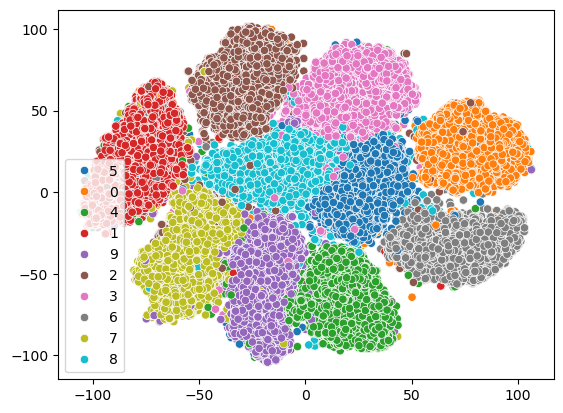

In [ ]:
sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y)

In [32]:
pca_2 = PCA(n_components=2)
X_2_PCA = pca_2.fit_transform(X)

<Axes: >

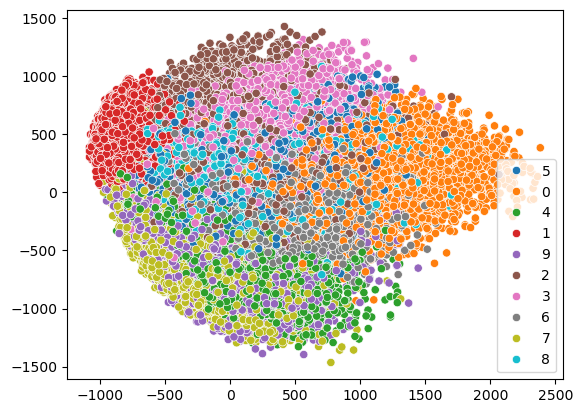

In [33]:
sns.scatterplot(x=X_2_PCA[:, 0], y=X_2_PCA[:, 1], hue=y)

In [34]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)

X_2_LLE = lle.fit_transform(X)

: 

In [ ]:
sns.scatterplot(x=X_2_LLE[:, 0], y=X_2_LLE[:, 1], hue=y)